In [986]:
#import libraries

import numpy as np
import sklearn as sk
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision            
import torch.nn as nn



In [987]:
# import file
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving student-mat.csv to student-mat (1).csv
User uploaded file "student-mat.csv" with length 56993 bytes


In [2250]:
# read file into dataframe
math_data = pd.read_csv("student-mat.csv", sep=';')

## preprocessing

In [2251]:
#one-hot encoding & convert to numpy array
data_encode = pd.get_dummies(math_data)

#drop G1, G2 comlumn
data_encode = data_encode.drop(['G1', 'G2'], axis=1)

feature_count = len(data_encode.columns.tolist()) - 1


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,10


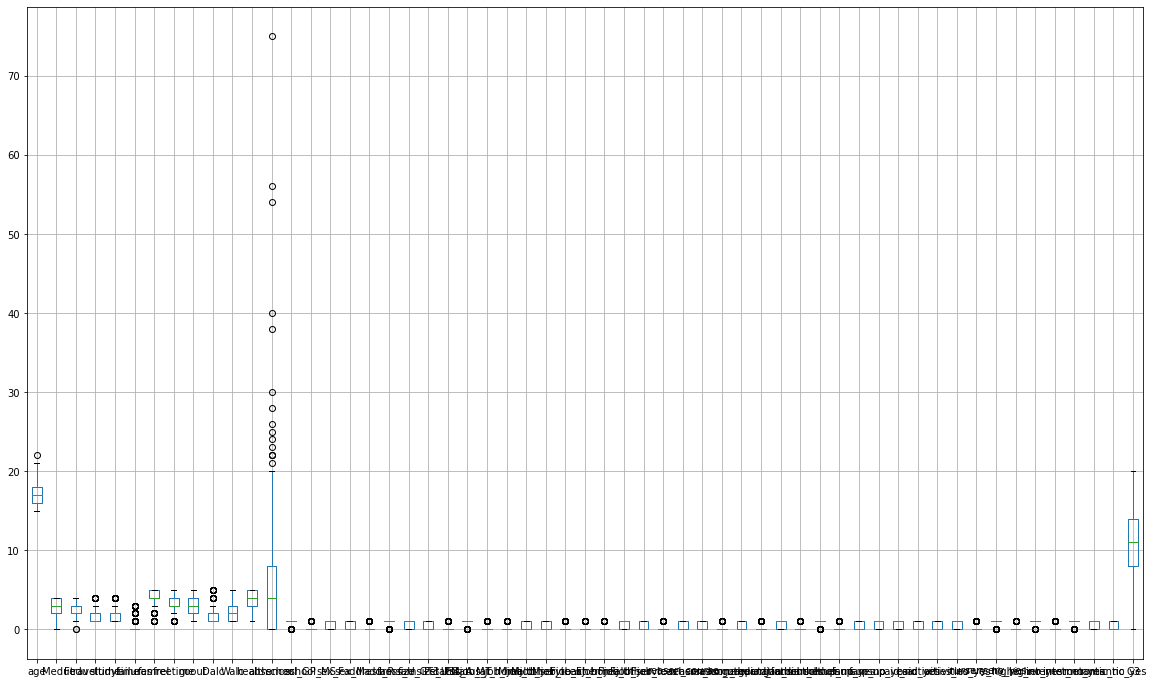

In [2252]:
# showing data with boxplot

from scipy import stats

df = data_encode
df = df.reindex(columns=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
                         'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 
                         'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
                         'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
                         'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 
                         'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'G3'])

df.boxplot(figsize=(20,12))
df



In [2253]:
# Removing outliers iteratively

col_list = df.columns.to_list()
for col in col_list:
    if col == 'G3':
        continue
    if col == 'absences':
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.70)
        IQR = Q3 - Q1

        filter = (df[col] >= Q1 - 1 * IQR) & (df[col] <= Q3 + 1 *IQR)
        df = df.loc[filter]
        continue

    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1    

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter] 


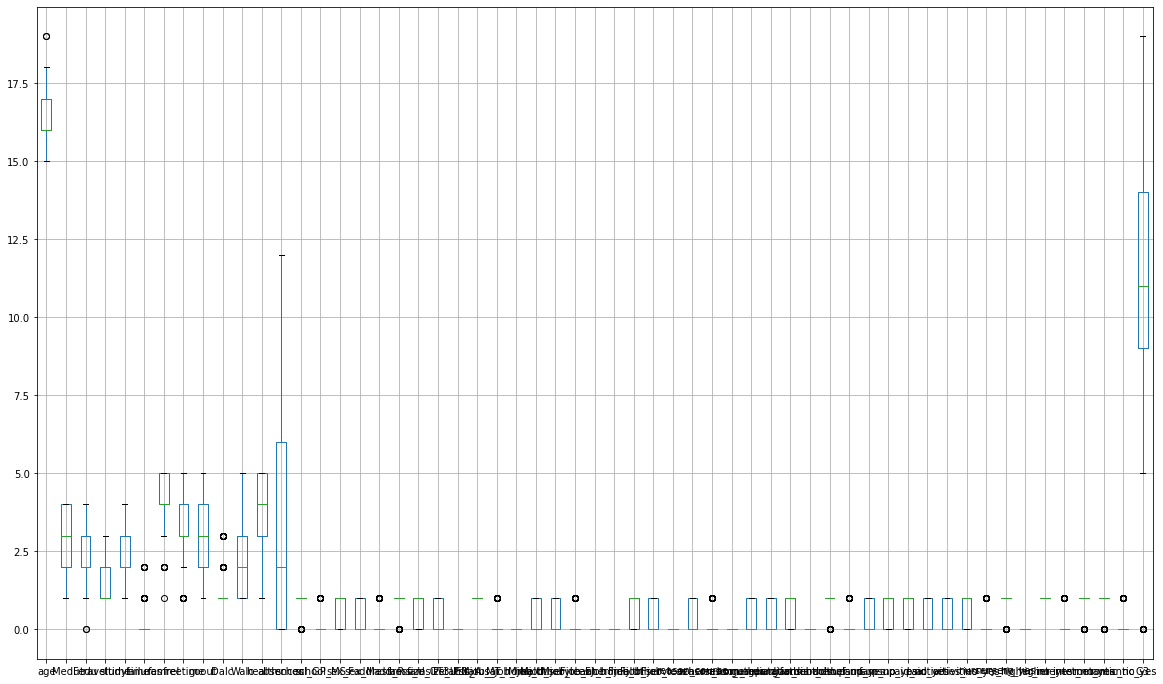

In [2254]:
#box plot after outliers removed

zscore_threshold = 1.8 
			  
df.boxplot(figsize=(20,12))

In [2255]:
#make missing values
row_list = df.index.to_list()
row_count = len(row_list)
random_index = np.random.rand(5) * row_count

# Handle missing Values
for i in random_index:
    df.loc[row_list[int(i)], 'traveltime'] = np.nan
    print(df.loc[[row_list[int(i)]]])
df = df.fillna(1)
print(df['traveltime'])

     age  Medu  Fedu  traveltime  ...  internet_yes  romantic_no  romantic_yes  G3
124   16     2     2         NaN  ...             1            0             1   8

[1 rows x 57 columns]
     age  Medu  Fedu  traveltime  ...  internet_yes  romantic_no  romantic_yes  G3
193   16     3     3         NaN  ...             1            1             0  10

[1 rows x 57 columns]
     age  Medu  Fedu  traveltime  ...  internet_yes  romantic_no  romantic_yes  G3
318   17     3     4         NaN  ...             1            1             0  10

[1 rows x 57 columns]
     age  Medu  Fedu  traveltime  ...  internet_yes  romantic_no  romantic_yes  G3
258   18     2     1         NaN  ...             1            1             0  14

[1 rows x 57 columns]
    age  Medu  Fedu  traveltime  ...  internet_yes  romantic_no  romantic_yes  G3
83   15     2     2         NaN  ...             1            1             0  15

[1 rows x 57 columns]
1      1.0
4      1.0
5      1.0
6      1.0
9      1.0
  

In [2256]:
#convert to numpy
data_num = df.to_numpy()

print(data_num.shape)

# split into X and y
X = data_num[:, :feature_count]
y = data_num[:,feature_count]

print(X.shape)
print(y.shape)

(183, 57)
(183, 56)
(183,)


## check feature distribution

In [2257]:
for i in range(0,56):
    print("scatter of feature", i)
    #plt.scatter(X[:,i], y)
    #plt.ylim(-1,21)
    #plt.xlim(np.min(X[:,i]-1), np.max(X[:,i]+1))
    #plt.show()
    
    #mglearn.discrete_scatter(X[:, i],y )

scatter of feature 0
scatter of feature 1
scatter of feature 2
scatter of feature 3
scatter of feature 4
scatter of feature 5
scatter of feature 6
scatter of feature 7
scatter of feature 8
scatter of feature 9
scatter of feature 10
scatter of feature 11
scatter of feature 12
scatter of feature 13
scatter of feature 14
scatter of feature 15
scatter of feature 16
scatter of feature 17
scatter of feature 18
scatter of feature 19
scatter of feature 20
scatter of feature 21
scatter of feature 22
scatter of feature 23
scatter of feature 24
scatter of feature 25
scatter of feature 26
scatter of feature 27
scatter of feature 28
scatter of feature 29
scatter of feature 30
scatter of feature 31
scatter of feature 32
scatter of feature 33
scatter of feature 34
scatter of feature 35
scatter of feature 36
scatter of feature 37
scatter of feature 38
scatter of feature 39
scatter of feature 40
scatter of feature 41
scatter of feature 42
scatter of feature 43
scatter of feature 44
scatter of feature 4

In [2258]:
#drop columns from X by making new dataset

X_new = X[:,1]
X_new = np.expand_dims(X_new,1)

X_new = np.append(X_new, X[:, 3:4], axis=1)
X_new = np.append(X_new, X[:, 5:6], axis=1)
X_new = np.append(X_new, X[:, 8:9], axis=1)
#X_new = np.append(X_new, X[:, 9:10], axis=1)
X_new = np.append(X_new, X[:, 12:13], axis=1)
X_new = np.append(X_new, X[:, 19:20], axis=1)
X_new = np.append(X_new, X[:, 20:21], axis=1)
#X_new = np.append(X_new, X[:, 23:24], axis=1)
X_new = np.append(X_new, X[:, 26:27], axis=1)
X_new = np.append(X_new, X[:, 27:28], axis=1)
X_new = np.append(X_new, X[:, 36:37], axis=1)
X_new = np.append(X_new, X[:, 40:41], axis=1)
X_new = np.append(X_new, X[:, 41:42], axis=1)
X_new = np.append(X_new, X[:, 43:44], axis=1)
X_new = np.append(X_new, X[:, 45:46], axis=1)
X_new = np.append(X_new, X[:, 48:49], axis=1)
X_new = np.append(X_new, X[:, 53:54], axis=1)
X_new = np.append(X_new, X[:, 54:55], axis=1)
#X_new = np.append(X_new, X[:, 55:56], axis=1)

print(X_new.shape)

(183, 17)


In [2259]:
#split and normalize

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.8 , random_state=50)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, train_size = 7/8 ,  random_state=50)

# Standardization

mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

std_train[std_train == 0] = 1 


X_train_standard = (X_train - mean_train) / std_train
X_test_standard = (X_test - mean_train) / std_train
X_eval_standard = (X_eval - mean_train) / std_train

## Design MLP

In [2260]:



from torch.utils.data import DataLoader, Dataset

from torchvision import datasets
from torchvision import transforms

%matplotlib inline
from matplotlib.pyplot import imshow, imsave

In [2261]:
MODEL_NAME = 'MLP'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("MODEL_NAME = {}, DEVICE = {}".format(MODEL_NAME, DEVICE))

MODEL_NAME = MLP, DEVICE = cpu


In [2262]:
_, feature_count = X_new.shape
print(feature_count)

class HelloMLP(nn.Module):
    def __init__(self, input_size = feature_count ):
        super(HelloMLP, self).__init__()
        self.mlp = nn.Sequential(            
            # 1st layer
            nn.Linear(input_size, 32),                
            nn.ReLU(),                      
            
            # 2nd layer
            nn.Linear(32, 16),                
            nn.ReLU(),
                   
            
            # 3rd (output) layer
            nn.Linear(16, 21),
        )
    
    def forward(self, x):
        y_ = self.mlp(x)     # compute 
        return y_

model = HelloMLP().to(DEVICE)

17


## prepare data

In [2263]:
#define Dataset class and make one

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset


class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

train_dataset = MyDataset(X_train_standard, y_train)
test_dataset = MyDataset(X_test_standard, y_test)
eval_dataset = MyDataset(X_eval_standard, y_eval)


In [2264]:
#define dataloader

batch_size = 8
train_loader = DataLoader( dataset = train_dataset, batch_size= batch_size, shuffle=True,  drop_last=True)
eval_loader = DataLoader( dataset = eval_dataset, batch_size=100, shuffle = False,  drop_last = False)
test_loader = DataLoader( dataset = test_dataset, batch_size= 100, shuffle=False,  drop_last = False)

## train model

In [2265]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [2266]:
# set loss function
loss_fn = nn.CrossEntropyLoss()

# set optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [2267]:
# reset loss history
all_losses = []

In [2268]:

max_epoch = 1000    # maximum number of epochs
step = 0             # initialize step counter variable

plot_every = 20
total_loss = 0 # Reset every plot_every iters

start = time.time()

for epoch in range(max_epoch):
    for idx, (x, y) in enumerate(train_loader):
        y_hat = model(x)   

        loss = loss_fn(y_hat, y)    # computing loss
        total_loss += loss.item()
        
        optim.zero_grad()           # reset gradient
        loss.backward()             # back-propagation (compute gradient)
        optim.step()                # update parameters with gradient
        
        # periodically print loss
        if step % 20 == 0:
            print('Epoch({}): {}/{}, Step: {}, Loss: {}'.format(timeSince(start), epoch, max_epoch, step, loss.item()))
        
        if (step + 1) % plot_every == 0:
            all_losses.append(total_loss / plot_every)
            total_loss = 0
        
        # periodically evalute model on test data
        if step % 20 == 0:
            model.eval()
            acc = 0.
            with torch.no_grad():  
                for idx, (x, y) in enumerate(eval_loader):
                    y_hat = model(x) # (N, 21)
                    loss = loss_fn(y_hat, y)
                    _, indices = torch.max(y_hat, dim=-1)     
                    acc += torch.sum(indices == y).item()   

                    
                    
            print('*'*20, 'Test', '*'*20)
            print('Step: {}, Loss: {}, test accuracy: {} %'.format(step, loss.item(), acc/len(eval_dataset)*100))
            
            print('*'*46)
            model.train()           # turn to train mode (enable autograd)
        step += 1

Epoch(0m 0s): 0/1000, Step: 0, Loss: 3.117050886154175
******************** Test ********************
Step: 0, Loss: 3.007519483566284, test accuracy: 0.0 %
**********************************************
Epoch(0m 0s): 1/1000, Step: 20, Loss: 2.9924397468566895
******************** Test ********************
Step: 20, Loss: 2.954155921936035, test accuracy: 0.0 %
**********************************************
Epoch(0m 0s): 2/1000, Step: 40, Loss: 2.9977517127990723
******************** Test ********************
Step: 40, Loss: 2.888976573944092, test accuracy: 0.0 %
**********************************************
Epoch(0m 0s): 4/1000, Step: 60, Loss: 2.8693509101867676
******************** Test ********************
Step: 60, Loss: 2.808903932571411, test accuracy: 0.0 %
**********************************************
Epoch(0m 0s): 5/1000, Step: 80, Loss: 2.6566543579101562
******************** Test ********************
Step: 80, Loss: 2.734820604324341, test accuracy: 0.0 %
***************

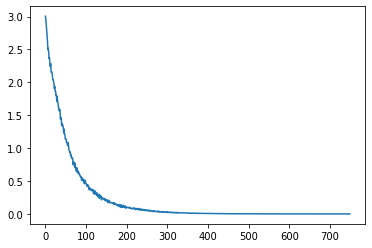

In [2269]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [2270]:
# Test
model.eval()
acc = 0.
step = 0
with torch.no_grad():
    for idx, (x, y) in enumerate(test_loader):
        y_hat = model(x) # (N, 21)
        loss = loss_fn(y_hat, y)
        
        _, indices = torch.max(y_hat, dim=-1)     
        acc += torch.sum(indices == y).item()
        #print(indices)
        #print(y)     

        step = step+1
print('*'*20, 'Test', '*'*20)
print('Step: {}, Loss: {}, Accuracy: {}%'.format(step, loss.item(), acc/len(test_dataset)*100))
print('*'*46)

tensor([11, 11, 15, 12, 16, 10, 10,  8, 10, 15, 15, 12, 13, 15,  0, 11, 12, 12,
        14, 14, 12, 12,  0, 12,  0, 15, 12, 14, 13, 15, 15, 13, 11, 12, 11, 13,
         0])
tensor([13, 10, 17, 11, 15, 14, 13,  9,  8, 14,  5,  8, 10, 11,  0, 11, 10, 10,
        14, 11, 16, 12,  6, 15,  9,  6, 15,  8,  9,  0, 15, 10, 11, 10, 11,  8,
        10])
******************** Test ********************
Step: 1, Loss: 29.355297088623047, Accuracy: 18.91891891891892%
**********************************************
